In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:_.2f}'.format)
import numpy as np

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

In [2]:
train_data = pd.read_csv('LTV.csv')
train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
929,QN10888,Oregon,7_726.99,No,Basic,High School or Below,1/24/11,Employed,F,87620,...,15,0,2,Personal Auto,Personal L3,Offer3,Call Center,24.06,Four-Door Car,Medsize
4590,JZ54775,Arizona,7_431.66,No,Extended,Bachelor,1/15/11,Employed,F,27688,...,86,0,9,Personal Auto,Personal L3,Offer1,Agent,572.35,Four-Door Car,Small
602,TL77607,California,8_852.69,No,Basic,Bachelor,2/5/11,Employed,M,67969,...,14,0,2,Personal Auto,Personal L3,Offer3,Branch,197.78,Four-Door Car,Medsize
3502,EV32492,Arizona,2_496.17,No,Basic,Bachelor,2/1/11,Employed,M,49136,...,95,0,1,Personal Auto,Personal L1,Offer4,Web,307.20,Four-Door Car,Medsize
1302,BU41599,Washington,5_581.76,No,Basic,Master,2/28/11,Employed,F,62739,...,80,0,3,Personal Auto,Personal L1,Offer2,Call Center,239.33,Two-Door Car,Medsize
4597,AM32820,California,3_709.92,No,Basic,Bachelor,1/29/11,Unemployed,M,0,...,33,0,1,Personal Auto,Personal L2,Offer2,Agent,1_082.90,SUV,Medsize
439,VQ38776,Oregon,5_303.76,No,Extended,College,1/2/11,Unemployed,F,0,...,63,0,3,Personal Auto,Personal L3,Offer2,Agent,395.34,Four-Door Car,Large
6117,QF69163,Washington,4_373.36,No,Premium,College,1/6/11,Disabled,F,25676,...,84,0,1,Personal Auto,Personal L3,Offer3,Web,542.40,Two-Door Car,Medsize
7853,QK24293,Oregon,6_265.34,Yes,Extended,Doctor,1/13/11,Unemployed,F,0,...,25,1,4,Corporate Auto,Corporate L1,Offer1,Agent,481.03,Four-Door Car,Medsize
7307,VF17463,Oregon,8_658.86,Yes,Basic,College,2/7/11,Employed,M,62464,...,45,0,4,Personal Auto,Personal L3,Offer2,Agent,400.18,Sports Car,Medsize


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Тренировочная выборка
X = train_data.drop('Customer Lifetime Value', axis = 1)
# Целевая переменная
y = pd.DataFrame(train_data['Customer Lifetime Value'])

In [5]:
# X = train_data.drop('Response', axis = 1)
# y = train_data['Response']

In [6]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [7]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [8]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00,9_134.00
mean,37_657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,30_379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,33_889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,62_320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,99_981.00,298.00,35.00,99.00,5.00,9.00,2_893.24


### Построим графики, посмотрим на распределение признаков

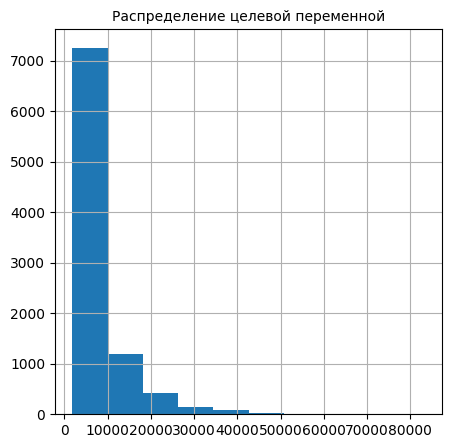

In [9]:
plt.figure(figsize = (5, 5))
plt.title('Распределение целевой переменной', size = 10)
train_data['Customer Lifetime Value'].hist()

plt.show()

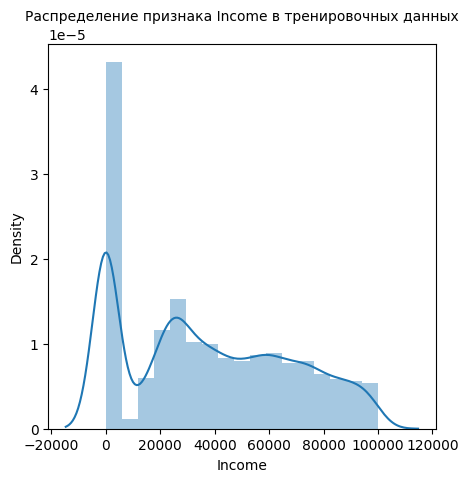

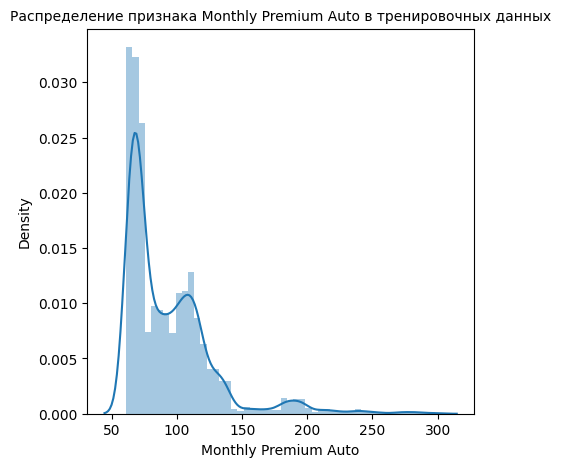

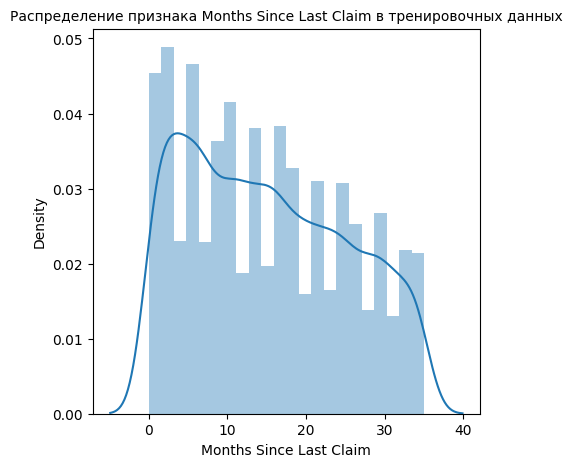

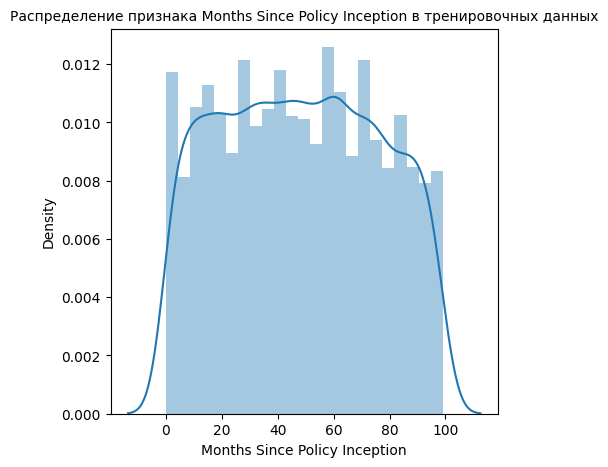

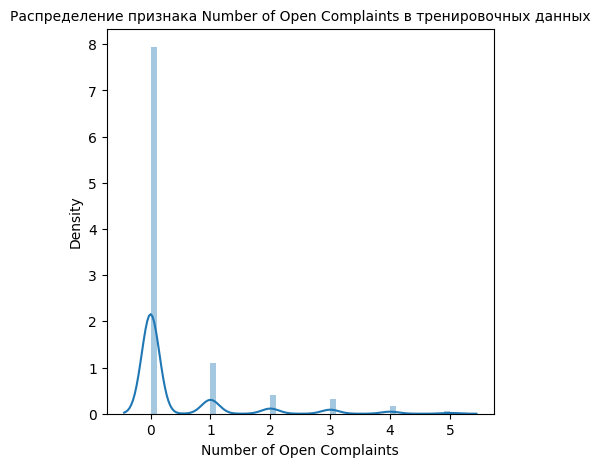

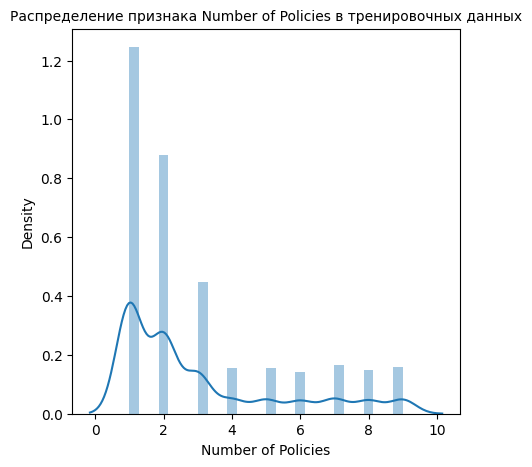

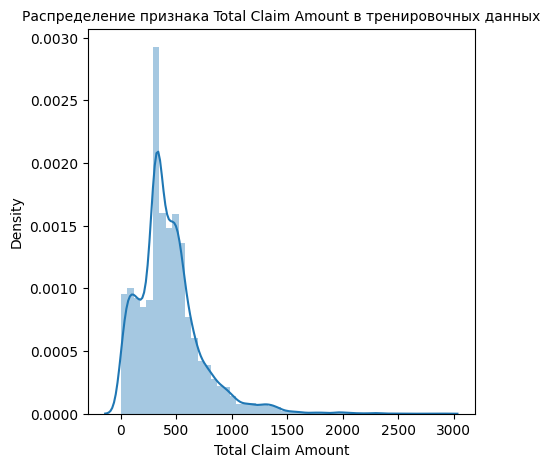

In [10]:
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных', size = 10)
    sns.distplot(train_data[col])

### Второй вариант графиков распределения признвков

In [11]:
# Словарь признаков и их русский перевод
translate_col = {
'Customer': 'идентификатор пользователя',
'State': 'штат',
'Customer Lifetime Value': 'LTV пользователя',
'Response': 'взаимодействие с рекламой',
'Coverage': 'тип страхового покрытия',
'Education': 'образование',
'Effective To Date': 'срок действия страховки',
'EmploymentStatus': 'трудоустройство',
'Gender': 'пол',
'Income': 'доход',
'Location Code': 'тип местности в которой проживает пользователь',
'Marital Status': 'семейное положение',
'Monthly Premium Auto': 'Ежемесячный Премиум Авто',
'Months Since Last Claim': 'месяцев с последнего \n требования по выплате компенсации',
'Months Since Policy Inception': 'месяцев с открытия страховки',
'Number of Open Complaints': 'количество незакрытых жалоб',
'Number of Policies': 'количество полисов',
'Policy Type': 'тип страховки',
'Policy': 'страховка',
'Renew Offer Type': 'обновленный тип предложения',
'Sales Channel': 'канал продаж',
'Total Claim Amount': 'сумма выплаченных компенсаций',
'Vehicle Class': 'класс автомобиля',
'Vehicle Size': 'размер автомобиля'
}

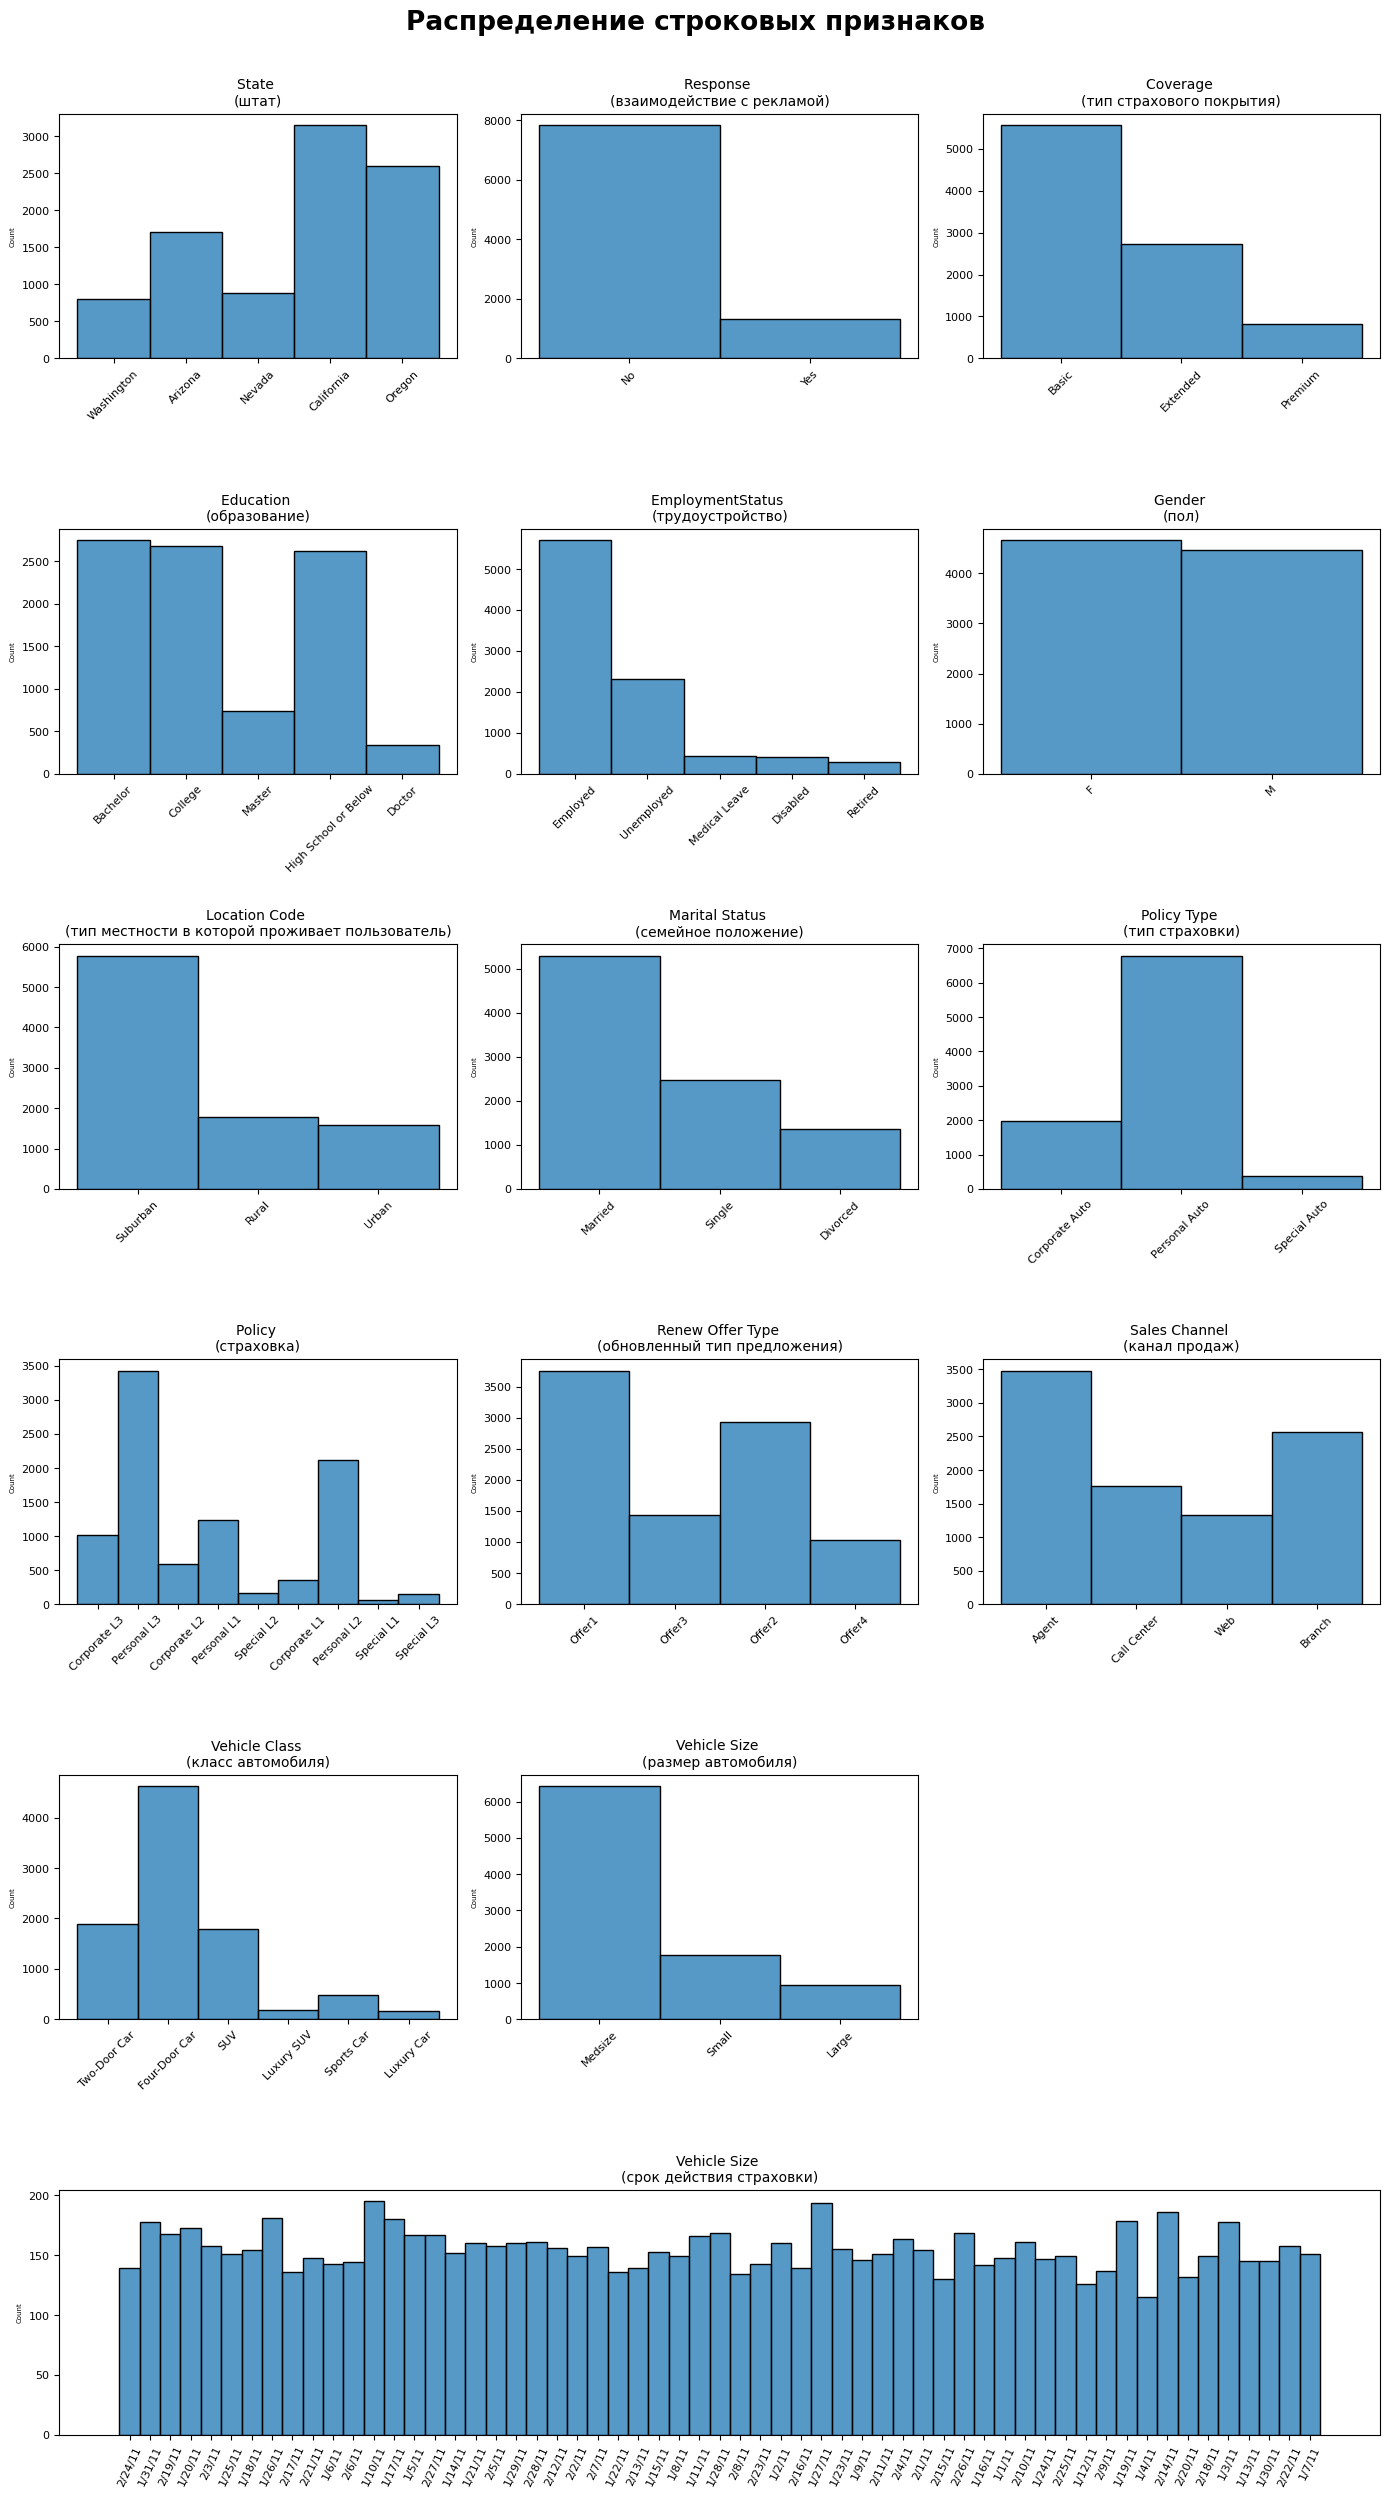

In [12]:
# for col in str_cols:
#     plt.figure(figsize = (5, 5))
#     plt.title(f'Распределение признака {col} в тренировочных данных', size = 5)
#     train_data[col].hist()

# Задаём размеры полотна [ширина, длина]
plt.figure(figsize=[14, 25])

# Общий заголовок для всех графиков
plt.suptitle('Распределение строковых признаков', 
              y=1.005, 
              fontsize=19, 
              fontweight='bold')
index_plt = 0
# Добавляем графики на полотно (3 шт. в одном ряду)
for col in str_cols:
    if not col in ['Customer', 'Effective To Date']:
        plt.subplot(6, 3, index_plt+1)
        # Заголовок для графика
        plt.title(f'{col} \n({translate_col[col]})', fontsize=10)
        # Задаём размер шривта и угол поворота текста для осей X и Y
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
        # Убираем подпись оси X
        plt.xlabel(' ')
        # Делаем размер шрифта по Y=5, не уберая название оси
        plt.ylabel('', fontsize=5)
        # Отрисовываем гистограмму
        sns.histplot(train_data[col])
        index_plt += 1

# Автоматически уместить все элементы на полотне    
plt.tight_layout()

# График во всю длину экрана
plt.subplot(6, 1, 6)
# Заголовок для графика
plt.title(f'{col} \n({translate_col["Effective To Date"]})', fontsize=10)
# Задаём размер шривта и угол поворота текста для осей X и Y
plt.xticks(rotation=65, fontsize=8)
plt.yticks(fontsize=8)
# Убираем подпись оси X
plt.xlabel(' ')
# Делаем размер шрифта по Y=5, не уберая название оси
plt.ylabel('', fontsize=5)
# Отрисовываем гистограмму
sns.histplot(train_data['Effective To Date'])
        
# Автоматически уместить все элементы на полотне    
plt.tight_layout()

# Вывести графики на экран
plt.show()

### Пример распределения признаков по столбцу Resonse

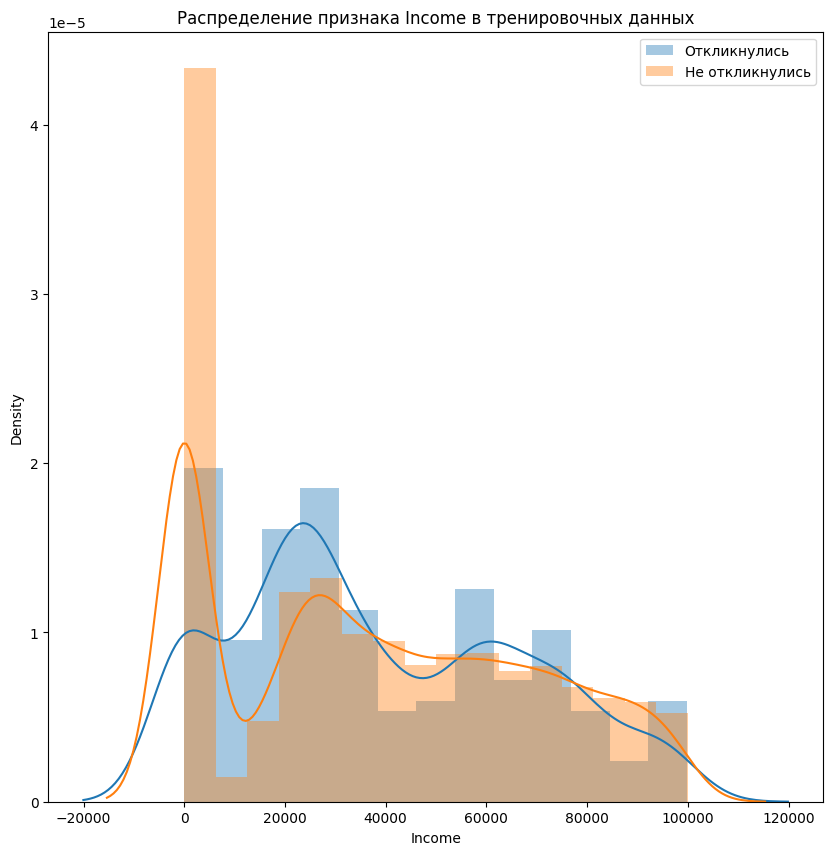

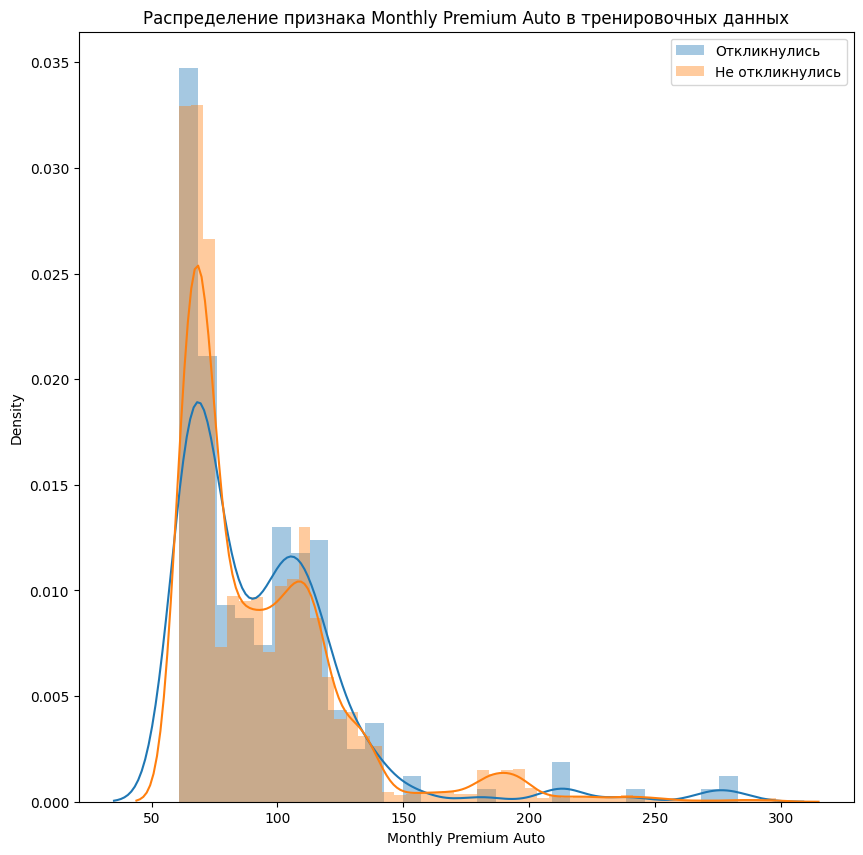

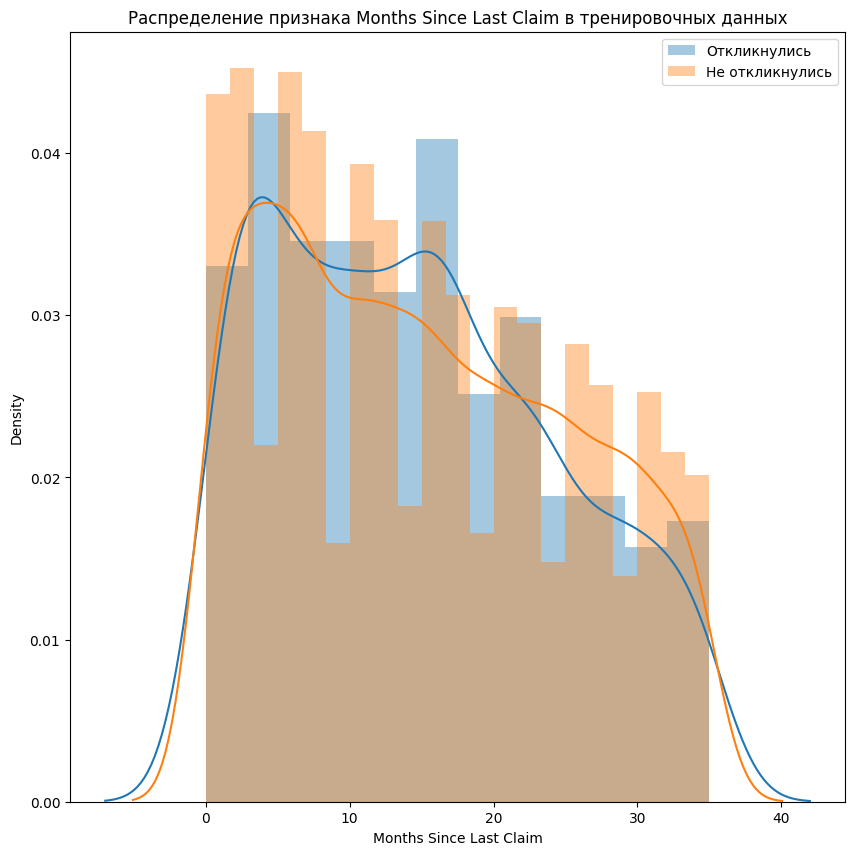

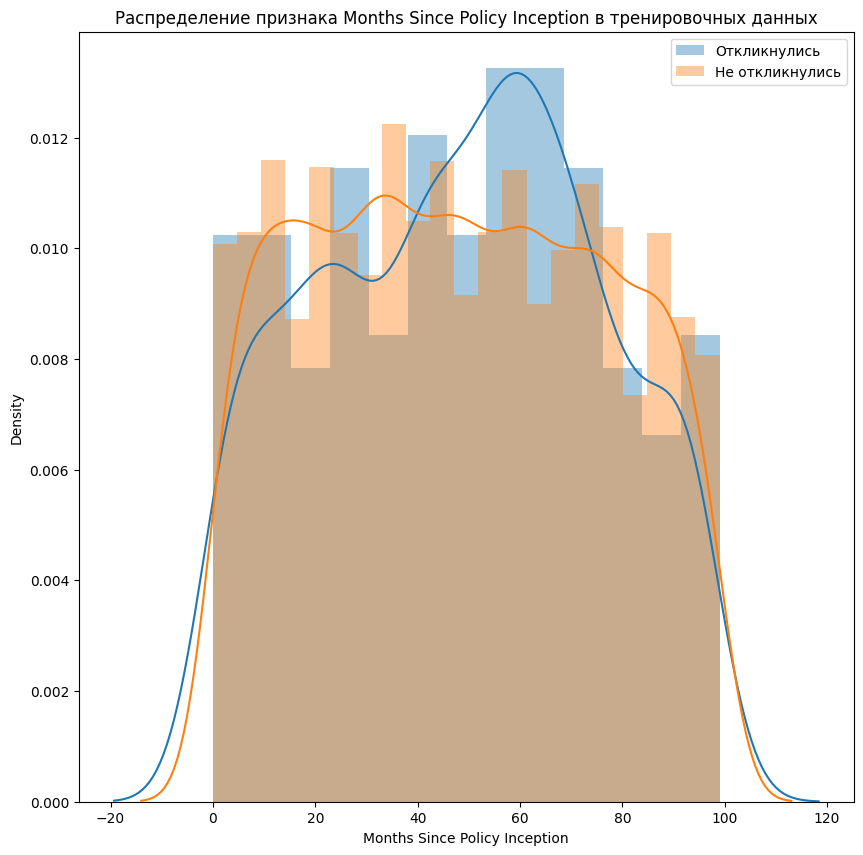

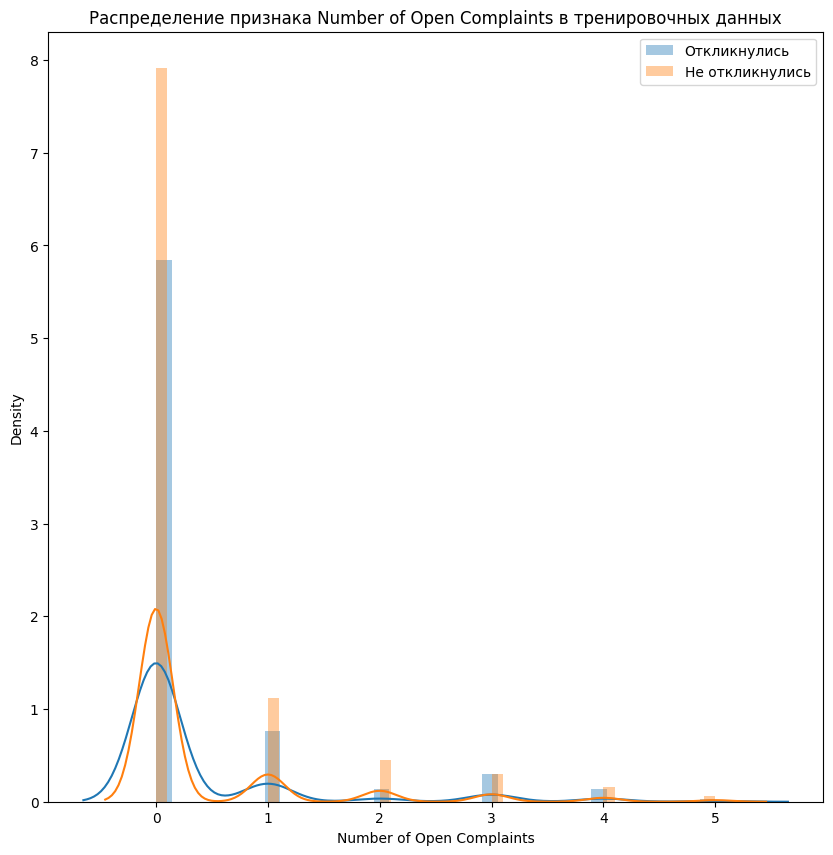

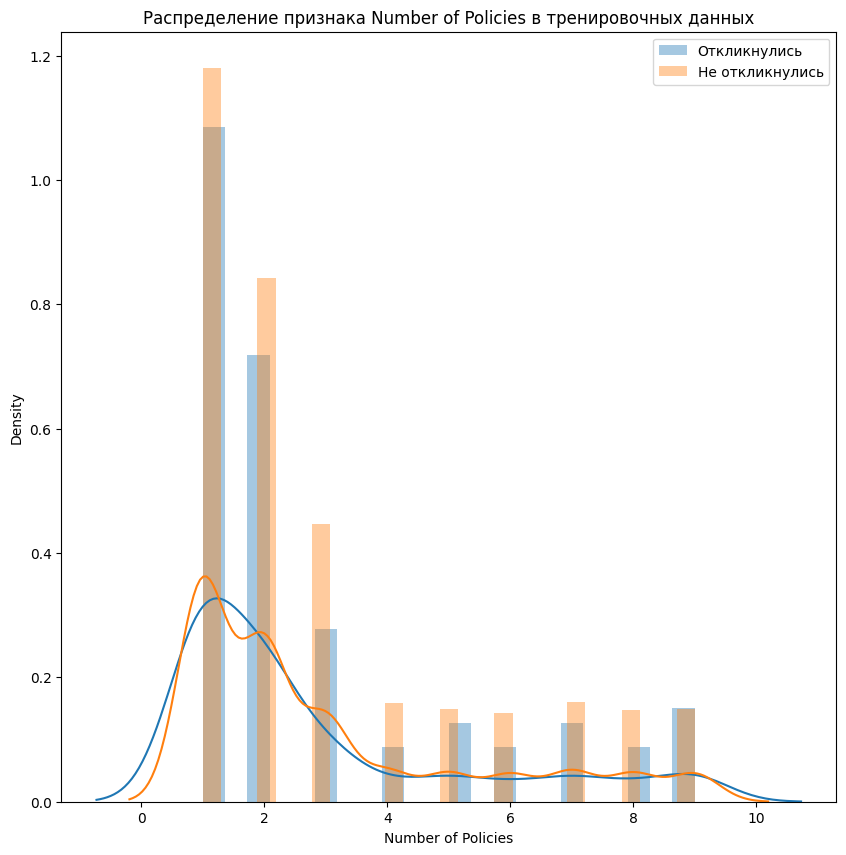

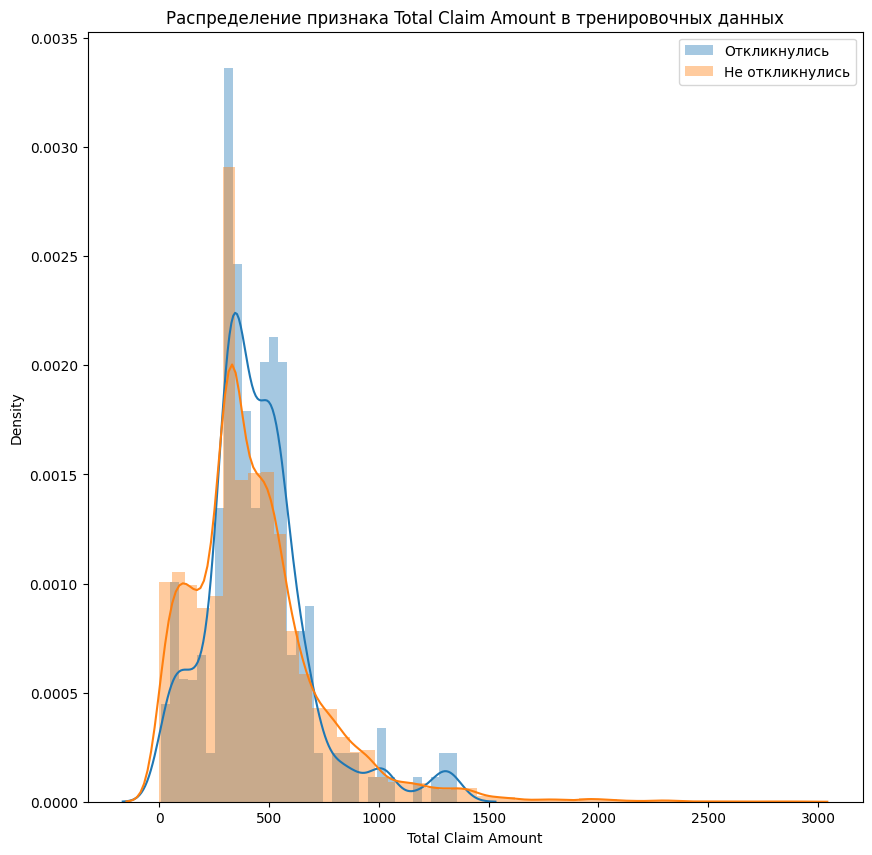

In [13]:
Response = train_data[train_data['Response'] == 'Yes']
not_Response = train_data[train_data['Response'] == 'No']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(Response[col], label = 'Откликнулись')
    sns.distplot(not_Response[col], label = 'Не откликнулись')   
    plt.legend()

### Предобработка признаков

In [14]:
def emission_test(ds, col_test, threshold_val=3):
    '''
    Функция проводит тестирование столбцов на выбросы методом Z-score.
    
    :param ds: исследуемый датасет,
    :param col_test: список, колонок,
    :param threshold_val: пороговое значение Z-score,
    :return: результат исследования.
    '''
    result = ''
    for col in col_test:
        # Вычисление Z-score
        z = np.abs(stats.zscore(ds[col]))
        # Установка порогового значения Z-score
        threshold = 3
        # Выявление выбросов на основе Z-score
        outliers = ds[col][z > threshold]

        if len(outliers) > 0:
            result += f'В столбце {col}, {len(outliers)} выбросов. Среднее по столбцу {ds[col].mean()}\n'
    
    
    return 'Выбросов нет.' if result == '' else result

In [15]:
# Выведем признаки которые имеют выбросы
print(emission_test(ds=X, col_test=num_cols))

В столбце Monthly Premium Auto, 200 выбросов. Среднее по столбцу 93.21929056273265
В столбце Number of Open Complaints, 205 выбросов. Среднее по столбцу 0.38438800087584846
В столбце Total Claim Amount, 158 выбросов. Среднее по столбцу 434.0887943128969



In [16]:
#  Удалим выбросы с помощью логорифмической функции
X['Monthly Premium Auto'] = np.log1p(X['Monthly Premium Auto'])
X['Total Claim Amount'] = np.log1p(X['Total Claim Amount'])
y['Customer Lifetime Value'] = np.log1p(y['Customer Lifetime Value'])


print(emission_test(ds=X, col_test=num_cols))
emission_test(ds=y, col_test=['Customer Lifetime Value'])

В столбце Monthly Premium Auto, 103 выбросов. Среднее по столбцу 4.494058343737844
В столбце Number of Open Complaints, 205 выбросов. Среднее по столбцу 0.38438800087584846
В столбце Total Claim Amount, 181 выбросов. Среднее по столбцу 5.797730899575215



'В столбце Customer Lifetime Value, 32 выбросов. Среднее по столбцу 8.748753196029405\n'

In [17]:
def visualization_numerical_characteristics():
    '''
    Визуализация цифровых признаков (так сделал, чтобы код в одном месте находился).
    '''
    plt.figure(figsize=[14, 13])

    # Общий заголовок для всех графиков
    plt.suptitle('Распределение числовых признаков', 
                  y=1.005, 
                  fontsize=19, 
                  fontweight='bold')

    for i, col in enumerate(num_cols):
        plt.subplot(3, 3, i+1)
        # Заголовок для графика
        plt.title(f'\n{col} \n({translate_col[col]})', fontsize=10)
        # Задаём размер шривта и угол поворота текста для осей X и Y
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        # Делаем размер шрифта по Y=5, не уберая название оси
        plt.ylabel('', fontsize=5)
        # Отрисовываем гистограмму
        sns.histplot(train_data[col])

    # Автоматически уместить все элементы на полотне    
    plt.tight_layout()

    # Вывести графики на экран
    plt.show()

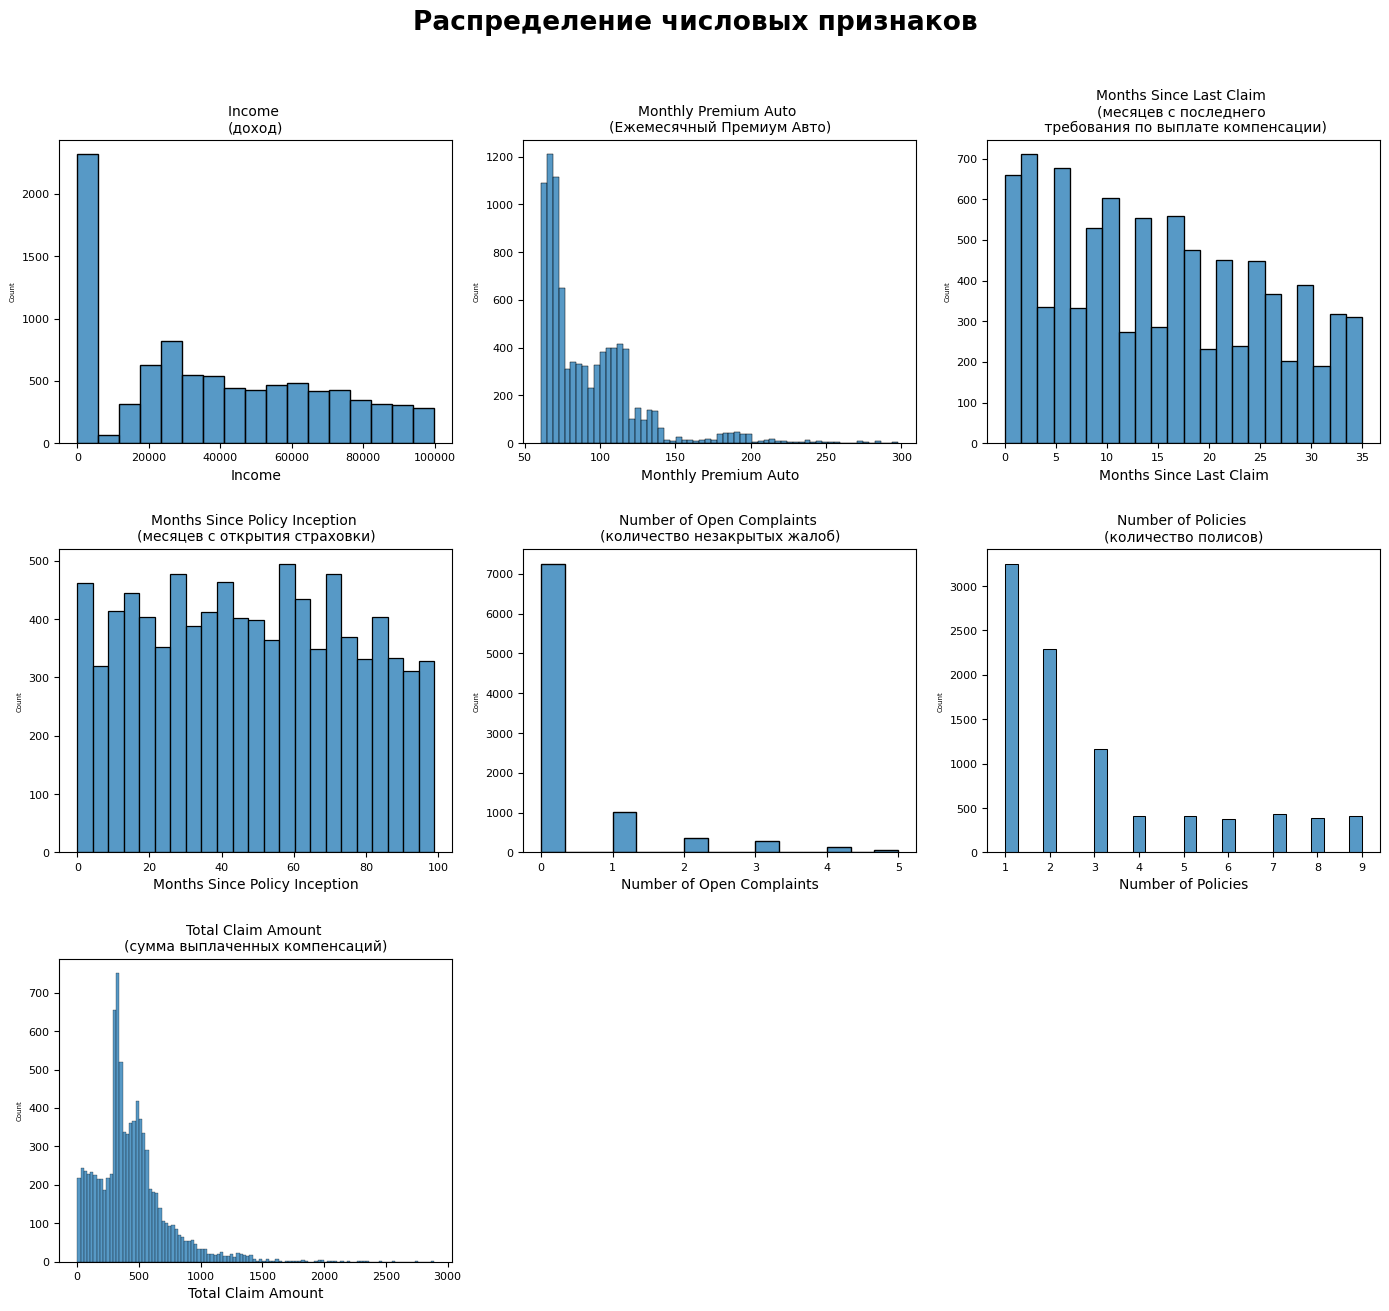

In [18]:
visualization_numerical_characteristics()

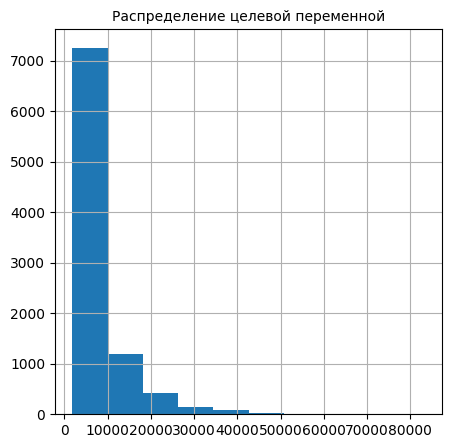

In [19]:
plt.figure(figsize = (5, 5))
plt.title('Распределение целевой переменной', size = 10)
train_data['Customer Lifetime Value'].hist()

plt.show()

In [20]:
# Переведём строковые признаки в числовые
le = LabelEncoder()
# Пробежимся по столбцам датафрейма и преобразуем буквеное обозначение в цифровое
for col in str_cols:
    X[col] = le.fit_transform(X[col].astype(str))

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int32  
 1   State                          9134 non-null   int32  
 2   Response                       9134 non-null   int32  
 3   Coverage                       9134 non-null   int32  
 4   Education                      9134 non-null   int32  
 5   Effective To Date              9134 non-null   int32  
 6   EmploymentStatus               9134 non-null   int32  
 7   Gender                         9134 non-null   int32  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int32  
 10  Marital Status                 9134 non-null   int32  
 11  Monthly Premium Auto           9134 non-null   float64
 12  Months Since Last Claim        9134 non-null   i

In [21]:
#Корреляция признаков
corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0

# Укажем в настройках, чтобы отображались все столбцы
pd.set_option('display.max_columns', None)
corr_matrix

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
State,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Response,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Coverage,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Education,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Effective To Date,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
EmploymentStatus,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.70,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00
Gender,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Income,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,0.00,0.00
Location Code,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00


In [22]:
pd.reset_option('display.max_columns')

Text(0.5, 1.0, 'График корреляции')

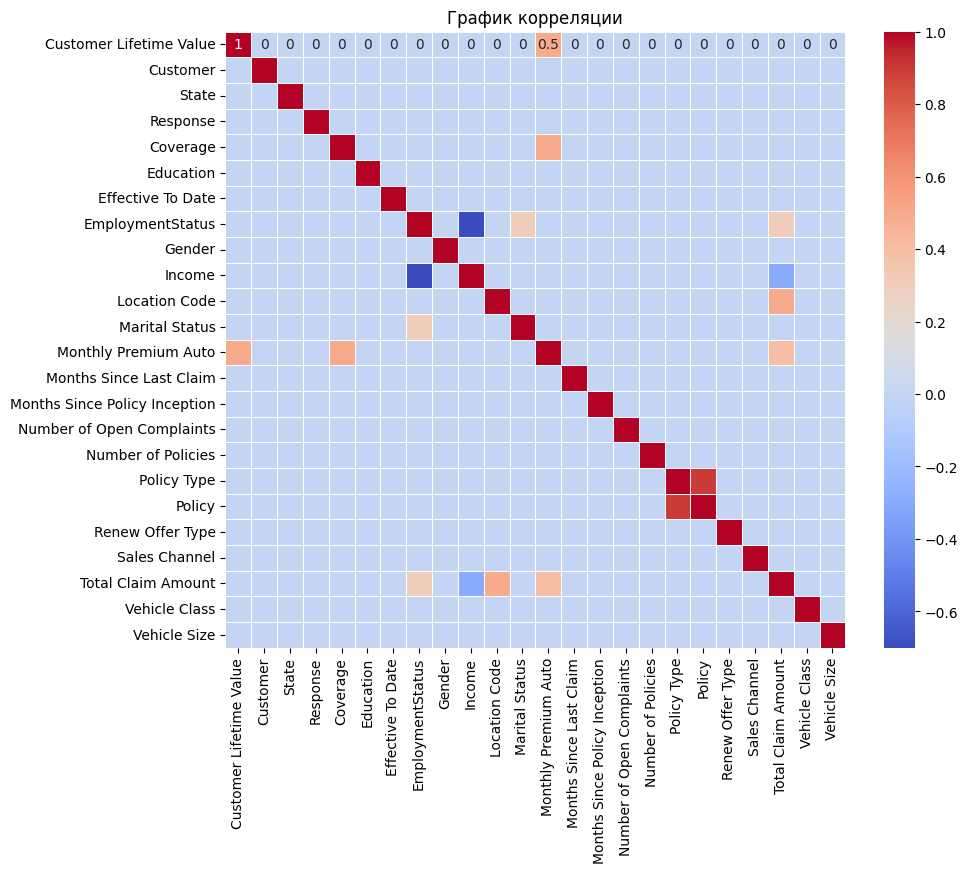

In [23]:
all_data = pd.DataFrame(X)
all_data.insert(0, 'Customer Lifetime Value', y)

# Построим график корреляции
corr_matrix = all_data.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('График корреляции')

In [24]:
# Удалим поле 'Customer' (id пользователя)
X = X.drop('Customer', axis = 1)

In [25]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression

# Кросс-валидация 
from sklearn.model_selection import cross_validate

line_reg = LinearRegression()
cv_line_reg = cross_validate(line_reg, X, y, cv = 5)
print("Результат Линейной регрессии:", sum(cv_line_reg['test_score']) / len(cv_line_reg['test_score']))

Результат Линейной регрессии: 1.0


In [26]:
# Лассо модель
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
cv_lasso_reg = cross_validate(lasso_reg, X, y, cv = 5)
print("Результат Лассо регрессии:", sum(cv_line_reg['test_score']) / len(cv_line_reg['test_score']))

Результат Лассо регрессии: 1.0


In [27]:
# Регрессия Хуберта
from sklearn.linear_model import HuberRegressor

huber_reg = HuberRegressor()
cv_huber_reg = cross_validate(huber_reg, X, y, cv = 5)
print("Результат регрессии Хуберта:", sum(cv_huber_reg['test_score']) / len(cv_huber_reg['test_score']))

Результат регрессии Хуберта: 0.1396198963875666


In [28]:
# Регрессия Байесовского хребта
from sklearn.linear_model import BayesianRidge

bayes_reg = BayesianRidge().fit(X, y)
cv_bayes_reg = cross_validate(bayes_reg, X, y, cv = 5)
print("Результат регрессии Байесовского хребта:", sum(cv_bayes_reg['test_score']) / len(cv_bayes_reg['test_score']))

Результат регрессии Байесовского хребта: 1.0


In [29]:
# Попробуем сделать предикт первой строчки датасета
np.expm1(bayes_reg.predict(np.array([X.iloc[0].values])))

array([2763.519279])

Из матрицы корреляции заметна положительная клрреляция между`Customer Lifetime Value` и `Monthly Premium Auto`.
Все линейные модели кроме регрессии Хуберта показали одинаковый результат.  
Удалось улучшить результат благодаря удалению выбросов в целевой переменной `y` с помощью логорифмической функции. 
При добавлении дополнительных параметров, результат ухудшается.